In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
sales = pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\Sales.csv")
sales.columns

Index(['TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR',
       'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK',
       'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY',
       'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE',
       'BRAND', 'SKU', 'INVOICED UNITS', 'CREDIT MEMO UNITS',
       'NET SALES UNITS', 'UNIT PRICE', 'INVOICED AMOUNT ',
       'SALES ACTIVITY CODE'],
      dtype='object')

In [252]:
item = pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\item.csv")
item.columns

Index(['SKU', 'CATEGORY', 'COLLECTION', 'LINE_UP', 'ENTRY_DATE', 'CATEGORY.1',
       'GENDER', 'CASE MATERIAL', 'CASE COLOR', 'CASE SHAPE', 'CASE SIZE',
       'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE', 'STRAP TYPE', 'STRAP COLOR',
       'ORIGINAL PRICE', 'PRICE RANGE', 'ITEM DISC', 'TECHNOLOGY', 'BRAND'],
      dtype='object')

In [253]:
data = pd.merge(sales,item,on='SKU')
data.shape

(14386, 41)

In [254]:
data.columns

Index(['TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR',
       'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK',
       'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY',
       'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE',
       'BRAND_x', 'SKU', 'INVOICED UNITS', 'CREDIT MEMO UNITS',
       'NET SALES UNITS', 'UNIT PRICE', 'INVOICED AMOUNT ',
       'SALES ACTIVITY CODE', 'CATEGORY', 'COLLECTION', 'LINE_UP',
       'ENTRY_DATE', 'CATEGORY.1', 'GENDER', 'CASE MATERIAL', 'CASE COLOR',
       'CASE SHAPE', 'CASE SIZE', 'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE',
       'STRAP TYPE', 'STRAP COLOR', 'ORIGINAL PRICE', 'PRICE RANGE',
       'ITEM DISC', 'TECHNOLOGY', 'BRAND_y'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [255]:
data['CATEGORY'].value_counts() # Mostly belongs to BASICS,STYLE,SPORTS,MARATHON,OUTDOOR

BASICS           5681
STYLE            3254
SPORTS           1336
MARATHON         1098
OUTDOOR           859
ENTRYPRICE        503
LADIES DRESS      429
PAIRS             279
URBAN STYLE       228
SMART STYLE       222
GENTS STREET      194
GENTS DRESS       156
REBEL STYLE        55
LADIES STREET      47
YOUTH              38
GWP2017             7
Name: CATEGORY, dtype: int64

In [256]:
data['NET SALES UNITS']=data['INVOICED UNITS']-data['CREDIT MEMO UNITS'] # so there is a problem in invoiced units so i have recalculate it. 
data['NET SALES UNITS']=data['NET SALES UNITS'].replace({-1:1,-2:2}) # This is wrong step but to convert my net sales unit i have used this.
data['SALES_AMOUNT']=data['NET SALES UNITS']*data['UNIT PRICE']

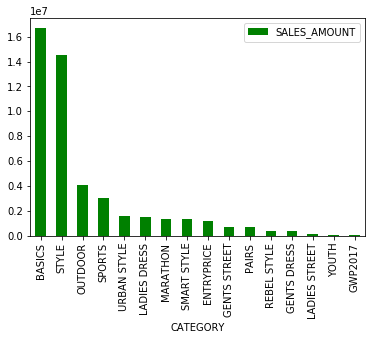

In [257]:
# CATEGORY
cat1 = data.pivot_table(index='CATEGORY', values='SALES_AMOUNT', aggfunc=sum)
cat1.sort_values('SALES_AMOUNT',ascending = False,inplace=True)
cat1.plot(kind="bar",color="green", ) 

# (1) Factor affecting Sales

In [258]:
# 1. Brand 

In [259]:
# Sales of Brand C is high so we can say that Brand A , Brand B --are less comptiable with technology.
brand=data['SALES_AMOUNT'].groupby(data['BRAND_x']).sum()
brand

BRAND_x
Brand A     4552428
Brand B     3271030
Brand C    39632824
Name: SALES_AMOUNT, dtype: int64

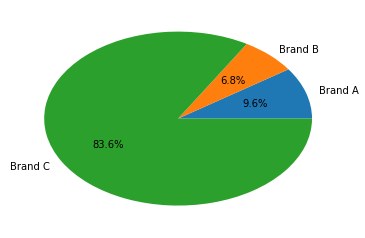

In [260]:
labels=['Brand A','Brand B','Brand C']
value=[4487768,3202530,39125642]
plt.pie(value,labels=labels,autopct='%1.1f%%')
plt.show() # Customer prefer BRAND C 

In [261]:
# 2. Location

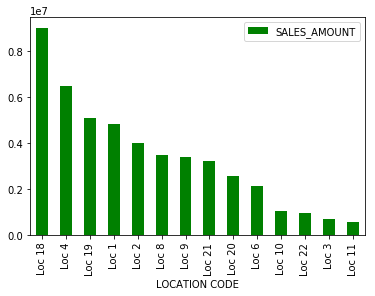

In [262]:
pivot = data.pivot_table(index='LOCATION CODE', values='SALES_AMOUNT', aggfunc=sum)
pivot.sort_values('SALES_AMOUNT',ascending = False,inplace=True)
pivot.plot(kind="bar",color="green", ) # LOCATION 18,4,191,2,8,9 are highly preferable.

In [263]:
pivot

,SALES_AMOUNT
LOCATION CODE,
Loc 18,9016335
Loc 4,6505055
Loc 19,5074265
Loc 1,4822265
Loc 2,4022420
Loc 8,3471945
Loc 9,3383090
Loc 21,3206715
Loc 20,2545123


In [264]:
# 3. TRANSACTION TYPE
b2=data['SALES_AMOUNT'].groupby(data['TRANS TYPE']).sum()
b2.sort_values(ascending=False)

TRANS TYPE
SI-ITEMS    47315397
CM-ITEMS      140885
Name: SALES_AMOUNT, dtype: int64

In [265]:
# 4. GENDER
b3=data['SALES_AMOUNT'].groupby(data['GENDER']).sum()
b3.sort_values(ascending=False)

GENDER
MALE      24541289
FEMALE    19264172
UNISEX     3633541
FKIDS        17280
Name: SALES_AMOUNT, dtype: int64

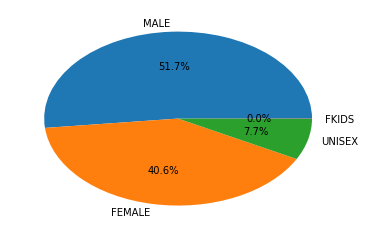

In [266]:
labels=['MALE','FEMALE','UNISEX','FKIDS']
value=[24541289,19264172,3633541,17280]
plt.pie(value,labels=labels,autopct='%1.1f%%')
plt.show()

In [267]:
# 5. COLLECTION
b4=data['SALES_AMOUNT'].groupby(data['COLLECTION']).sum()
b4.sort_values(ascending=False).head(15) #highly preferable collections 

COLLECTION
BH2015      5566871
FH2016      4441646
FW2017      3961442
SS2018      3877308
SS2017      3250630
FW2015      3090649
FW2018      2704852
SS2016      2410974
FW2016      1895685
BH2017      1730890
BH2016      1474724
PRE 2010    1464157
SS2015      1405515
FW2014      1110334
SS2011       955643
Name: SALES_AMOUNT, dtype: int64

In [268]:
data['COLLECTION'].value_counts().head(10)

BH2015       2081
FH2016       1265
FW2015        974
SS2018        871
FW2017        849
8LAP 2017     683
BH2017        653
SS2016        605
SS2017        604
FW2018        576
Name: COLLECTION, dtype: int64

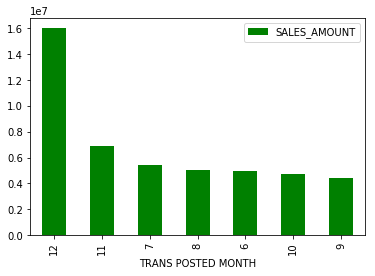

In [269]:
# 6.MONTH SALE
pivot1 = data.pivot_table(index='TRANS POSTED MONTH', values='SALES_AMOUNT', aggfunc=sum)
pivot1.sort_values('SALES_AMOUNT',ascending = False,inplace=True)
pivot1.plot(kind="bar",color="green", ) # max sales are in month 12, but in other month sales is constant.

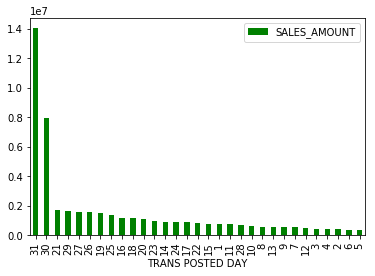

In [270]:
# 7. DAY SALE
pivot2 = data.pivot_table(index='TRANS POSTED DAY', values='SALES_AMOUNT', aggfunc=sum)
pivot2.sort_values('SALES_AMOUNT',ascending = False,inplace=True)
pivot2.plot(kind="bar",color="green", ) # max sales are in we are getting in 30,31 DAY of the month.

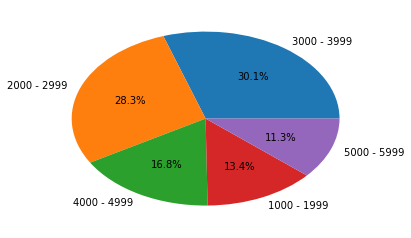

In [271]:
# 8. PRICE RANGE
# SO THERE IS A PROBLEM IN PRICE RANGE DUE TO SPACING AND VALUES
data['PRICE RANGE']=data['PRICE RANGE'].replace({'0-999':0 - 999,'-999':0 - 999,'-4999':4000 - 4999,'1000-1999':1000 - 1999,'2000-2999':2000 - 2999,'3000-3999':3000 - 3999,'4000-4999':4000 - 4999,'5000-5999':5000 - 5999,'6000-6999':6000 - 6999,'7000-7999':7000 - 7999,'8000-8999':8000 - 8999,'9000-9999':9000 - 9999,'10000-14999':10000 - 14999,'10000 - 10999':10000 - 14999})
data['PRICE RANGE']=data['PRICE RANGE'].replace({'-999':0 - 999,'-4999':4000 - 4999})
b6=data['SALES_AMOUNT'].groupby(data['PRICE RANGE']).sum()
b6.sort_values(ascending=False).head()
labels2=['3000 - 3999','2000 - 2999','4000 - 4999','1000 - 1999','5000 - 5999']
value2=[11769881,11077236,6561774,5241575,4435857]
plt.pie(value2,labels=labels2,autopct='%1.1f%%')
plt.show()

In [272]:
# 9. product sold in range
data['PRICE RANGE'].value_counts().head()

2000 - 2999    4028
3000 - 3999    3217
1000 - 1999    2719
4000 - 4999    1411
0 - 999        1368
Name: PRICE RANGE, dtype: int64

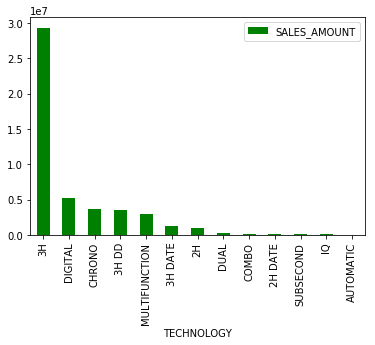

In [273]:
# 10. Technology
pivot2 = data.pivot_table(index='TECHNOLOGY', values='SALES_AMOUNT', aggfunc=sum)
pivot2.sort_values('SALES_AMOUNT',ascending = False,inplace=True)
pivot2.plot(kind="bar",color="green", ) # MAXIMUM SALES WE ARE GETTING IN 3H TECHNOLOGY 

In [274]:
data['TECHNOLOGY'].value_counts().head(10)

3H               9290
DIGITAL          2603
3H DD             901
CHRONO            517
MULTIFUNCTION     437
3H DATE           325
2H                181
DUAL               45
COMBO              32
2H DATE            25
Name: TECHNOLOGY, dtype: int64

In [275]:
# 11. SALES ACTIVITY CODE
b7= data.pivot_table(index='SALES ACTIVITY CODE',values='SALES_AMOUNT',aggfunc=sum)
b7.sort_values('SALES_AMOUNT',ascending = False,inplace= True)
b7.head(15) # This shows that sales at different Activity

,SALES_AMOUNT
SALES ACTIVITY CODE,
REGDISC,12708009
MYSTMX,10742835
REGULAR,7379038
MYSMD,6768058
MYSREG,3967007
PRIVADO,1504340
BOGO,1271785
SP10,1004290
MYSMB,454640


# (2) Exploring BRANDS

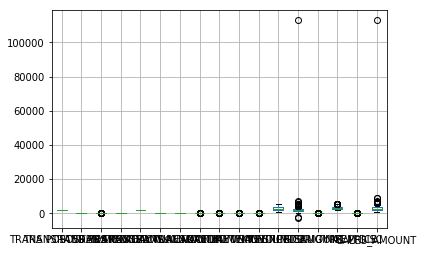

In [276]:
d1=data.loc[data['BRAND_x']=='Brand A']
d1['UNIT PRICE'].max()               
# Min= 745
# Max= 5290
d1['SKU'].value_counts().head(10) # TOP 10 SELLING PRODUCT IN BRAND A
data['SALES_AMOUNT'].groupby(data['SKU']).sum().sort_values(ascending=False).head(8) # TOP 8 PRODUCT SALES
d1.boxplot()

In [277]:
d2=data.loc[data['BRAND_x']=='Brand B']
d2['UNIT PRICE'].max ()                  
# Min=1465
# Max= 12290
d2['SKU'].value_counts().head() # TOP 10 SALES PRODUCT ID IN BRAND B

PPL.15388JSBG/06M    13
PPL.14378JSR/12P     13
PPL.14536JSBN/02     12
PPL.15303JSB/02M     12
PPL.15464JYS/02M      9
Name: SKU, dtype: int64

In [278]:
d3=data.loc[data['BRAND_x']=='Brand C']
d3['UNIT PRICE'].max()        
# Min= 590
# Max= 14990
#TOP 10 SALES IN BRAND C vs BRAND PRODUCT
d3['SKU'].value_counts().head(10) 

TW00B304E    379
TW00B303E    378
T2Z601       230
TB320        229
TA319        223
TW00A304E    207
T5K801       172
TW00A301E    164
TW00T104E    157
TW00BW01E    153
Name: SKU, dtype: int64

# (a) BRAND C

In [318]:
# FEATURE CHECKING OF BRAND C
f1=data.loc[data['BRAND_y']=='Brand C']
f1.head()
## CHECKING FEATURES OF BRAND C -> BASICS CATEGORY ##
## !. CATEGORY
f3=f1.loc[(f1['CATEGORY']=='BASICS')]
f3.iloc[:,10:]
f3['CASE MATERIAL'].value_counts() #All Basic material belons to brass
f3['CASE COLOR'].value_counts()    #GLD = 3653, SLV= 1700, 2T GLD SLV =290
f3['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=5379, RECTANGLE AND OVAL=158,103
f3['DIAL TYPE'].value_counts()      # aLL WATCHES ARE ANALOG
f3['DIAL COLOR'].value_counts()     # WHT=2139,CHMP=1167,SLV=1093,BRW=585
f3['STRAP TYPE'].value_counts()     # mOSTLY SS=4297, LEATHER =1131 , BRASS= 249
f3['STRAP COLOR'].value_counts()    # GLD=2373,SLV=1372, 2T GLD SLV=679
f3['PRICE RANGE'].value_counts()    # 2000-2999=2675,3000-3999=1635,1000-1999=1247,4000-4999=80,5000-5999=32
f3['ITEM DISC'].value_counts()      # 0.5=2869,0.3=1485,0.0=1304
f3['TECHNOLOGY'].value_counts()     #3H=4952, 3H DD=687
f4=f3.loc[f3['TECHNOLOGY']=='3H']
f4['PRICE RANGE'].value_counts()   # 3H technology price range is > 1000, but mostly in 2000-2999
f4['SALES_AMOUNT'].sum()
f4['GENDER'].value_counts()

FEMALE    2855
MALE      1867
UNISEX     230
Name: GENDER, dtype: int64

In [319]:
## CHECKING FEATURES OF BRAND C -> STYLE CATEGORY
## !. CATEGORY
g1=f1.loc[(f1['CATEGORY']=='STYLE')]
g1.iloc[:,10:]
#g1['CASE MATERIAL'].value_counts() #moast style material belons to brass
#g1['CASE COLOR'].value_counts()    #GLD = 1204, SLV= 1184, 2T GLD SLV =414
#g1['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=2910, RECTANGLE=126 AND OVAL=150
#g1['DIAL TYPE'].value_counts()      # mostly WATCHES ARE ANALOG
#g1['DIAL COLOR'].value_counts()     # WHT=1369,SLV=535,Blk=497
#g1['STRAP TYPE'].value_counts()     # mOSTLY SS=1548, LEATHER =1185 , BRASS= 206
#g1['STRAP COLOR'].value_counts()    # BRW = 661,2T GLD SLV=  620, GLD= 618, SLV= 564, BLK= 488, RGD= 92
#g1['PRICE RANGE'].value_counts()    # 4000 - 4999 =874,3000 - 3999= 825,5000 - 5999= 486,2000 - 2999=  380,1000 - 1999= 294
#g1['ITEM DISC'].value_counts()      # 0.5=428,0.3=809,0.0=1970
#g1['TECHNOLOGY'].value_counts()     #3H=2412, 3H DD=191,CHRONO=337
g2=g1.loc[g1['TECHNOLOGY']=='3H']
g2['PRICE RANGE'].value_counts()   # 3H technology price range is > 1000, but mostly in 3000-5999
g2['SALES_AMOUNT'].sum()
g2['GENDER'].value_counts()

FEMALE    1486
MALE       712
UNISEX     214
Name: GENDER, dtype: int64

In [317]:
## CHECKING FEATURES OF BRAND C -> SPORTS CATEGORY
## !. CATEGORY
h1=f1.loc[(f1['CATEGORY']=='SPORTS')]
h1.iloc[:,10:]
#h1['CASE MATERIAL'].value_counts() # RESIN MATERIAL
#h1['CASE COLOR'].value_counts()    #BLK=357,SLV=176,GRN=137,WHT=134,BLU=111
#h1['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=1233, RECTANGLE=38 AND OVAL=27
#h1['DIAL TYPE'].value_counts()      # mostly WATCHES ARE DIGITAL=1295
#h1['DIAL COLOR'].value_counts()     # NORMAL=1212,INVERTED=101,BLK= 10,WHT=7,BLU=6
#h1['STRAP TYPE'].value_counts()     # mOSTLY RESIN=1269, RUBBER =47 , FABRIC= 20
#h1['STRAP COLOR'].value_counts()    # BLK    460,WHT    251,GRN    146,BLU    118,PPL     80,YLW     70
#h1['PRICE RANGE'].value_counts()    # 1000 - 1999 = 650,0 - 999 = 223,2000 - 2999 = 182,3000 - 3999= 129,4000 - 4999=102,7000 - 7999= 38,5000 - 5999= 12
#h1['ITEM DISC'].value_counts()      # 0.7=689,0.5=264,0.0=258,0.3=125
#h1['TECHNOLOGY'].value_counts()     #DIGITAL=1295, 3H=22,COMBO=19
h2=h1.loc[h1['TECHNOLOGY']=='DIGITAL']
h2['PRICE RANGE'].value_counts()   # DIGITAL technology price range is > 1000, but mostly in 3000-5999
h2['SALES_AMOUNT'].sum()
h2['GENDER'].value_counts()

UNISEX    723
MALE      372
FEMALE    200
Name: GENDER, dtype: int64

In [282]:
a3=data['SALES_AMOUNT'].groupby(f1['GENDER']).sum() # BRAND C
a3

GENDER
FEMALE    16855967
FKIDS        17280
MALE      19127831
UNISEX     3631746
Name: SALES_AMOUNT, dtype: int64

In [283]:
a4=data['SALES_AMOUNT'].groupby(data['TECHNOLOGY']).sum() # BRAND C
a4.sort_values(ascending=False)

TECHNOLOGY
3H               29335922
DIGITAL           5241808
CHRONO            3669458
3H DD             3457443
MULTIFUNCTION     2930796
3H DATE           1220344
2H                 972950
DUAL               240254
COMBO              131992
2H DATE             82015
SUBSECOND           71550
IQ                  60610
AUTOMATIC           33180
Name: SALES_AMOUNT, dtype: int64

# BRAND B

In [284]:
# FEATURE CHECKING OF BRAND C
K1=data.loc[data['BRAND_y']=='Brand B']
K1['CATEGORY'].value_counts()  # mOSTLY URBAN AND SMART STYLE

URBAN STYLE    228
SMART STYLE    222
REBEL STYLE     55
Name: CATEGORY, dtype: int64

In [312]:
## CHECKING FEATURES OF BRAND B -> URBAN STYLE CATEGORY ##
## !. CATEGORY
K2=K1.loc[(K1['CATEGORY']=='URBAN STYLE')]
K2.iloc[:,10:]
#K2['CASE MATERIAL'].value_counts() #moast style material SS=172,ALLOY=53,
#K2['CASE COLOR'].value_counts()    #SLV= 111,BLK =57,RGD=22
#K2['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=216, RECTANGLE=126 AND OVAL=150
#K2['DIAL TYPE'].value_counts()      # WATCHES ARE ONLY ANALOG=228
#K2['DIAL COLOR'].value_counts()     # Blk=78,SLV=44,BLU=39,BRW=28,GRY=16
#K2['STRAP TYPE'].value_counts()     # mOSTLY SS=78, LEATHER =75 , RUBBER= 39
#K2['STRAP COLOR'].value_counts()    # BLK = 92,SLV=  75, BRW= 39, BLU= 11
#K2['PRICE RANGE'].value_counts()    # 7000 - 7999=58,8000 - 8999=57,6000 - 6999=49,4000 - 4999=29
#K2['ITEM DISC'].value_counts()      # 0.0=187,0.3=21,0.512
#K2['TECHNOLOGY'].value_counts()     #MULTIFUNCTION =179, 3H DATE=33,CHRONO=15
K3=K2.loc[K2['TECHNOLOGY']=='MULTIFUNCTION']
K3['PRICE RANGE'].value_counts()   # MUTIFUNCTION technology IS IN ALL RANGE BUT MOSTLY THEY ARE BELONGING TO 6K-9K
K3['SALES_AMOUNT'].sum()
K3['GENDER'].value_counts()

MALE    179
Name: GENDER, dtype: int64

In [310]:
## CHECKING FEATURES OF BRAND B -> SMART  STYLE CATEGORY ##
## !. CATEGORY
K4=K1.loc[(K1['CATEGORY']=='SMART STYLE')]
K4.iloc[:,10:]
#K4['CASE MATERIAL'].value_counts() #moast style material SS=158,ALLOY=64,
#K4['CASE COLOR'].value_counts()    #SLV= 120,BLK =62,GUN=18,RGD=11
#K4['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=222
#K4['DIAL TYPE'].value_counts()      # WATCHES ARE ONLY ANALOG=222
#K4['DIAL COLOR'].value_counts()     # Blk=94,SLV=53,BLU=34,BRW=20,GRY=15
#K4['STRAP TYPE'].value_counts()     # mOSTLY SS=89, LEATHER =85 , ALLOY=48
#K4['STRAP COLOR'].value_counts()    # BLK = 84,SLV=  61, BRW= 48, GRY= 13
#K4['PRICE RANGE'].value_counts()    # 5000 - 5999 =91(MOSTLY),6000 - 6999=39,3000 - 3999=28,7000 - 7999=24,4000 - 4999=24
#K4['ITEM DISC'].value_counts()      # 0.0=169,0.3=44,0.5=7
#K4['TECHNOLOGY'].value_counts()     #3H DATE= 102,MULTIFUNCTION =89,3H=12
K5=K4.loc[K4['TECHNOLOGY']=='MULTIFUNCTION']
K5['PRICE RANGE'].value_counts()   # 3H DATE technology IS IN ALL RANGE BUT MOSTLY THEY ARE BELONGING TO 6K-7K
#MULTIFUNCTION technology IS IN ALL RANGE BUT MOSTLY THEY ARE BELONGING TO 5K-7K
K5['GENDER'].value_counts()

MALE    89
Name: GENDER, dtype: int64

In [287]:
a2=data['SALES_AMOUNT'].groupby(K1['GENDER']).sum() # BRAND B
a2

GENDER
FEMALE       2065
MALE      3267170
UNISEX       1795
Name: SALES_AMOUNT, dtype: int64

# BRAND A

In [292]:
# FEATURE CHECKING OF BRAND A
L1=data.loc[data['BRAND_y']=='Brand A']
L1.drop(['INVOICED AMOUNT ', 'SALES ACTIVITY CODE'], axis=1)
L1['CATEGORY'].value_counts()  # mOSTLY URBAN AND SMART STYLE
## CHECKING FEATURES OF BRAND B -> ENTRYPRICE CATEGORY ##
##CATEGORY
L2=L1.loc[(L1['CATEGORY']=='ENTRYPRICE')]
L2.iloc[:,10:]
L2['CASE MATERIAL'].value_counts() #moast style material SS=429
L2['CASE COLOR'].value_counts()    #SLV= 256,GLD=231
#L2['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=503
#L2['DIAL TYPE'].value_counts()      # WATCHES ARE ONLY ANALOG=503
#L2['DIAL COLOR'].value_counts()     # GLD=183,SLV=167,BLK=92
#L2['STRAP TYPE'].value_counts()     # mOSTLY SS=503
#L2['STRAP COLOR'].value_counts()    # SLV = 262,GLD=  183
#L2['PRICE RANGE'].value_counts()    # 2000 - 2999=333,1000 - 1999=166
#L2['ITEM DISC'].value_counts()      # 0.0=422,0.3=77
#L2['TECHNOLOGY'].value_counts()     #3H=497,3H DATE=6
L3=L2.loc[L2['TECHNOLOGY']=='3H']
L3['PRICE RANGE'].value_counts()   # 3H technology IS IN ALL RANGE BUT MOSTLY THEY ARE BELONGING TO 1K-3K
L3['SALES_AMOUNT'].sum()

1185287

In [294]:
## CHECKING FEATURES OF BRAND A
#  LADIES DRESS CATEGORY ##
##CATEGORY
M2=L1.loc[(L1['CATEGORY']=='LADIES DRESS')]
M2.iloc[:,10:]
#M2['CASE MATERIAL'].value_counts() #moast style material SS=429
#M2['CASE COLOR'].value_counts()    #SLV= 137,GLD=222
#M2['CASE SHAPE'].value_counts()     # maJORITY BELONGS TO ROUND=421
#M2['DIAL TYPE'].value_counts()      # WATCHES ARE ONLY ANALOG=429
#M2['DIAL COLOR'].value_counts()     # WHT=50,SLV=286
#M2['STRAP TYPE'].value_counts()     # mOSTLY SS=409
#M2['STRAP COLOR'].value_counts()    # SLV = 128,GLD=  172,RGD=54
#M2['PRICE RANGE'].value_counts()    # 3000 - 3999    197,2000 - 2999    102,4000 - 4999     75
#M2['ITEM DISC'].value_counts()      # 0.0=358,0.7=29
#M2['TECHNOLOGY'].value_counts()     #3H=330,3H DATE=92
M4=M2.loc[M2['TECHNOLOGY']=='3H']
M4['PRICE RANGE'].value_counts()   # 3H technology IS IN ALL RANGE BUT MOSTLY THEY ARE BELONGING TO 3K-4K
M4['SALES_AMOUNT'].sum()

1153106

In [302]:
a1=L3['SALES_AMOUNT'].groupby(L3['GENDER']).sum() #BRAND A
a1

GENDER
FEMALE    382792
MALE      802495
Name: SALES_AMOUNT, dtype: int64

In [ ]:
 ###### THANKS ######